# 合并与分割

In [1]:
import tensorflow as tf

2024-07-09 15:56:43.964616: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
a = tf.ones([4, 35 ,8])
b = tf.ones([2, 35, 8])

2024-07-09 15:56:45.765171: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-07-09 15:56:45.775952: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-07-09 15:56:45.872170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-09 15:56:45.872277: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4060 Ti computeCapability: 8.9
coreClock: 2.535GHz coreCount: 34 deviceMemorySize: 7.75GiB deviceMemoryBandwidth: 268.25GiB/s
2024-07-09 15:56:45.872289: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-07-09 15:56:45.920187: I tensorflow/stream_executor/platform

In [3]:
c = tf.concat([a,b], axis=0)
c.shape

TensorShape([6, 35, 8])

In [4]:
a = tf.ones([4, 32, 8])
b = tf.ones([4, 3, 8])

In [5]:
tf.concat([a,b], axis=1).shape

TensorShape([4, 35, 8])

In [6]:
a = tf.ones([4, 35 ,8])
b = tf.ones([4, 35, 8])
tf.concat([a, b], axis=-1).shape

TensorShape([4, 35, 16])

## stack

In [7]:
tf.stack([a, b], axis=0).shape

TensorShape([2, 4, 35, 8])

In [8]:
tf.stack([a, b], axis=3).shape

TensorShape([4, 35, 8, 2])

In [9]:
a = tf.ones([4, 35 ,8])
b = tf.ones([4, 35, 8])

In [10]:
c = tf.stack([a, b], axis=0)
c.shape

TensorShape([2, 4, 35, 8])

In [11]:
aa, bb = tf.unstack(c, axis=0)
aa.shape, bb.shape

(TensorShape([4, 35, 8]), TensorShape([4, 35, 8]))

In [12]:
res = tf.unstack(c, axis=3)
res[0].shape, res[7].shape

(TensorShape([2, 4, 35]), TensorShape([2, 4, 35]))

## split

In [13]:
res = tf.unstack(c, axis=3)
len(res)

8

In [14]:
res = tf.split(c, axis=3, num_or_size_splits=2)
len(res)

2

In [15]:
res = tf.split(c, axis=3, num_or_size_splits=[2,2,4])
len(res)

3

In [16]:
res[0].shape, res[2].shape

(TensorShape([2, 4, 35, 2]), TensorShape([2, 4, 35, 4]))

In [17]:
x = tf.random.normal([10, 35, 8])
result = tf.split(x, num_or_size_splits=[4,2,2,2], axis=0)
result[0].shape

TensorShape([4, 35, 8])

In [82]:
x = tf.random.normal([10, 35 ,8])
result = tf.unstack(x, axis=0)
len(result)

10

# 数据统计

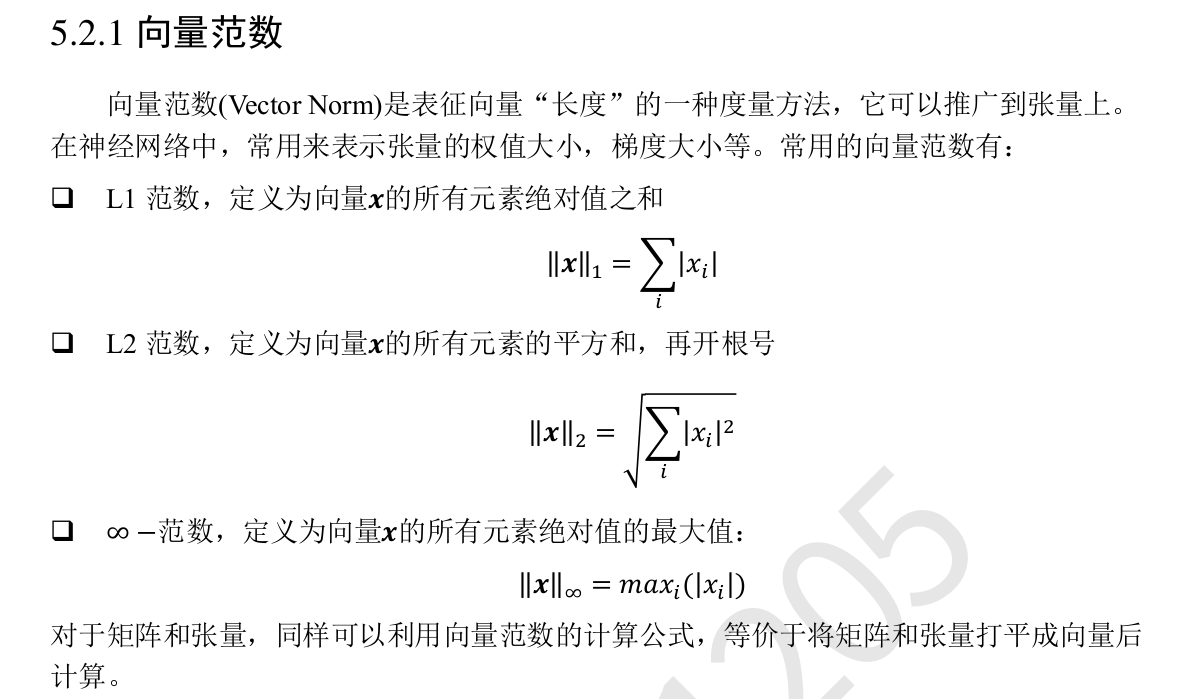

In [18]:
a = tf.ones([2, 2])

In [19]:
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [20]:
tf.sqrt(tf.reduce_sum(tf.square(a)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [21]:
a = tf.ones([4, 28, 28, 3])
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=96.99484>

In [22]:
tf.sqrt(tf.reduce_sum(tf.square(a)))

<tf.Tensor: shape=(), dtype=float32, numpy=96.99484>

In [23]:
b = tf.ones([2, 2])
tf.norm(b)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [24]:
tf.norm(b, ord=2, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4142135, 1.4142135], dtype=float32)>

In [25]:
b = tf.ones([2, 2])

In [26]:
# tf.norm(b, ord=1)

## 5.2.2 最值、均值、和

In [27]:
a = tf.random.normal([4, 10])
a

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[-0.58962816,  0.6657155 ,  1.3579537 ,  1.0641323 ,  0.96093327,
        -0.6211752 ,  0.34349534,  0.02518666, -1.0673208 ,  0.01470315],
       [-1.1570398 ,  1.2360575 , -1.4400718 , -0.9159566 ,  1.5756313 ,
        -0.3214625 , -0.53217167, -1.3138248 ,  0.18759082, -1.1375366 ],
       [ 0.88312227,  0.47986278,  3.638535  ,  0.22493641, -0.26118475,
        -1.4319956 ,  0.40883413, -0.9157753 , -0.01849599,  0.1478795 ],
       [-0.8609063 , -0.41414082,  1.5888865 ,  0.70413697, -1.6401054 ,
         0.33137056, -0.9213998 , -0.6151345 , -0.5589623 ,  1.6716115 ]],
      dtype=float32)>

In [28]:
tf.reduce_min(a), tf.reduce_max(a), tf.reduce_mean(a)

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.6401054>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.638535>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.019407168>)

In [29]:
tf.reduce_min(a, axis=1), tf.reduce_max(a, axis=1), tf.reduce_mean(a, axis=1)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.0673208, -1.4400718, -1.4319956, -1.6401054], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.3579537, 1.5756313, 3.638535 , 1.6716115], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.21539955, -0.38187844,  0.31557187, -0.07146434], dtype=float32)>)

In [30]:
a.shape

TensorShape([4, 10])

In [31]:
tf.argmax(a).shape

TensorShape([10])

In [32]:
tf.argmax(a)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 1, 2, 0, 1, 3, 2, 0, 1, 3])>

## tf.equal比较

In [33]:
a = tf.constant([1,2,3,2,5])
a

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 2, 5], dtype=int32)>

In [34]:
b = tf.range(5)
b

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [35]:
tf.equal(a, b)

<tf.Tensor: shape=(5,), dtype=bool, numpy=array([False, False, False, False, False])>

In [36]:
res = tf.equal(a, b)
res

<tf.Tensor: shape=(5,), dtype=bool, numpy=array([False, False, False, False, False])>

In [37]:
tf.reduce_sum(tf.cast(res, dtype=tf.int32))

<tf.Tensor: shape=(), dtype=int32, numpy=0>

## tf.unique

In [38]:
a = tf.range(5)
a

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [39]:
tf.unique(a)

Unique(y=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>, idx=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>)

In [40]:
a = tf.constant([4,2,2,4,3])
tf.unique(a)

Unique(y=<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 2, 3], dtype=int32)>, idx=<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 1, 0, 2], dtype=int32)>)

## sort,argsort

In [41]:
a = tf.random.shuffle(tf.range(5))
a

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 0, 3, 2, 4], dtype=int32)>

In [42]:
# 按降序排列
tf.sort(a,direction='DESCENDING')

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0], dtype=int32)>

In [43]:
tf.argsort(a, direction='DESCENDING')

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 2, 3, 0, 1], dtype=int32)>

In [44]:
idx = tf.argsort(a, direction='DESCENDING')
idx

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 2, 3, 0, 1], dtype=int32)>

In [45]:
tf.gather(a, idx)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0], dtype=int32)>

In [46]:
a = tf.random.uniform([3,3], maxval=10, dtype=tf.int32)
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[5, 3, 1],
       [2, 2, 8],
       [9, 3, 8]], dtype=int32)>

In [47]:
tf.sort(a)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 2, 8],
       [3, 8, 9]], dtype=int32)>

In [48]:
tf.sort(a, direction='DESCENDING')

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[5, 3, 1],
       [8, 2, 2],
       [9, 8, 3]], dtype=int32)>

In [49]:
idx = tf.argsort(a)
idx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[2, 1, 0],
       [0, 1, 2],
       [1, 2, 0]], dtype=int32)>

In [50]:
res = tf.math.top_k(a, 2)
res

TopKV2(values=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[5, 3],
       [8, 2],
       [9, 8]], dtype=int32)>, indices=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 0],
       [0, 2]], dtype=int32)>)

In [51]:
res.indices

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 0],
       [0, 2]], dtype=int32)>

In [52]:
res.values

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[5, 3],
       [8, 2],
       [9, 8]], dtype=int32)>

In [53]:
prob = tf.constant([[0.1, 0.2, 0.7], [0.2,0.7,0.1]])
target = tf.constant([2,0])
target

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 0], dtype=int32)>

In [54]:
k_b = tf.math.top_k(prob, 3).indices
k_b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 1, 0],
       [1, 0, 2]], dtype=int32)>

In [55]:
k_b = tf.transpose(k_b, [1,0])
k_b

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 1],
       [1, 0],
       [0, 2]], dtype=int32)>

In [56]:
target = tf.broadcast_to(target, [3,2])
target

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 0],
       [2, 0],
       [2, 0]], dtype=int32)>

# 填充与复制

In [57]:
a = tf.reshape(tf.range(9),[3,3])
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [58]:
tf.pad(a,[[0,0],[0,0]])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [59]:
tf.pad(a,[[1,1],[0,0]])

<tf.Tensor: shape=(5, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 0, 0]], dtype=int32)>

In [60]:
tf.pad(a,[[1,1],[1,0]])

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 1, 2],
       [0, 3, 4, 5],
       [0, 6, 7, 8],
       [0, 0, 0, 0]], dtype=int32)>

In [61]:
tf.pad(a,[[1,1],[1,1]])

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0],
       [0, 3, 4, 5, 0],
       [0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [62]:
a = tf.random.normal([4, 28, 28, 3])

In [63]:
b = tf.pad(a, [[0,0],[2,2],[2,2],[0,0]])
b.shape

TensorShape([4, 32, 32, 3])

In [64]:
a = tf.reshape(tf.range(9),[3,3])
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [65]:
tf.tile(a, [1,2])

<tf.Tensor: shape=(3, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]], dtype=int32)>

In [66]:
tf.tile(a, [2,1])

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [67]:
tf.tile(a, [2,2])

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]], dtype=int32)>

## 推荐使用broadcast_to

# 张量限幅

In [68]:
a = tf.range(10)
a

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [69]:
# 选择a中数据和2最大的那个
tf.maximum(a, 2)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [70]:
#选择a中数据和8最小的那个
tf.minimum(a, 8)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8], dtype=int32)>

In [71]:
tf.clip_by_value(a, 2, 8)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8, 8], dtype=int32)>

In [72]:
# 实现relu函数
a = a - 5
tf.nn.relu(a)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4], dtype=int32)>

In [73]:
tf.maximum(a, 0)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4], dtype=int32)>

## clip_by_norm

In [74]:
a = tf.random.normal([2,2], mean=10)
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10.688834,  9.899994],
       [10.572294, 10.345752]], dtype=float32)>

In [75]:
tf.norm(a)

<tf.Tensor: shape=(), dtype=float32, numpy=20.762201>

In [76]:
aa = tf.clip_by_norm(a, 15)

In [77]:
tf.norm(aa)

<tf.Tensor: shape=(), dtype=float32, numpy=15.000001>

## Gradient clipping

In [78]:
from   tensorflow.keras import datasets, layers, optimizers

In [79]:
(x, y), _ = datasets.mnist.load_data()